
    This Source Code Form is subject to the terms of the Mozilla Public
    License, v. 2.0. If a copy of the MPL was not distributed with this
    file, You can obtain one at http://mozilla.org/MPL/2.0/.


In [1]:
# Enable automatic module reload
%load_ext autoreload
%autoreload 2

# To ease the loading of modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Load BEACS module
from beacs.agents.beacs import BEACS, Configuration

# Load Metrics
from example.metrics.MazeMetrics import \
    _maze_metrics, \
    _how_many_peps_match_non_aliased_states, \
    _mean_reliable_classifier_specificity, \
    _when_full_knowledge_is_achieved, \
    _enhanced_effect_error

# Load Plotting Wrappers
from example.metrics.MazePlottingWrapper import \
    parse_metrics_to_df, \
    plot_performance

# Load environments
import gym
import my_mazes

# Agent - BEACS

## Common parameters

In [2]:
#Environmental Set Up
RANDOM_ATTRIBUTE_LENGTH = 0
CLASSIFIER_LENGTH = 8 + RANDOM_ATTRIBUTE_LENGTH
NUMBER_OF_POSSIBLE_ACTIONS = 8
SLIPPERY_PROB = 0.
MAZE = "MazeE1-v0"

#Exploration Set Up
NUMBER_OF_EXPLORE_TRIALS = 5000
METRICS_TRIAL_FREQUENCY_EXPLORE = 100
EPSILON = 0.8
BETA_ALP = 0.05

#Exploitation Set Up
NUMBER_OF_EXPLOIT_TRIALS_NO_RL = 500
BETA_EXPLOIT_NO_RL = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL_START = 500
BETA_EXPLOIT_RL_START = 0.05
NUMBER_OF_EXPLOIT_TRIALS_RL = 500
BETA_EXPLOIT_RL = 0.05

#RL Set Up
GAMMA = 0.95
BETA_RL = 0.05

#GA Set Up
CROSSOVER = 0.8
MUTATION = 0.3

#BEACS Set Up
DO_ZIP = True
ENABLE_PEP = True
LENGTH_OF_BEHAVIORAL_SEQUENCES = 2

## Environment - Maze

In [3]:
# Initialize environment
maze = gym.make(MAZE)
# Set up probability to do a random action
maze.env.set_prob_slippery(SLIPPERY_PROB)
# Set up random attribute length
maze.env.set_random_attribute_length(RANDOM_ATTRIBUTE_LENGTH)
# Reset it, by putting an agent into random position
maze.reset()
# Render the state in ASCII
maze.render('aliasing_human')
# Get environmental state transitions
#maze.env.get_theoritical_probabilities()


■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ ■ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ ■ □ □ □ ■ □ ■
■ □ ■ □ $ □ ■ □ ■
■ □ ■ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ A □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


## Training of BEACS - Exploration

In [4]:
%%time

cfg_explore = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=METRICS_TRIAL_FREQUENCY_EXPLORE,
    do_pep=ENABLE_PEP,
    beta_alp=BETA_ALP,
    beta_rl=BETA_RL,
    gamma=GAMMA,
    epsilon=EPSILON,
    u_max=CLASSIFIER_LENGTH,
    mu=MUTATION,
    chi=CROSSOVER,
    bs_max=LENGTH_OF_BEHAVIORAL_SEQUENCES
)

agent_explore = BEACS(cfg_explore)
population_explore, metrics_explore = agent_explore.explore(maze, NUMBER_OF_EXPLORE_TRIALS)

CPU times: user 27min 5s, sys: 5.04 s, total: 27min 10s
Wall time: 32min 55s


### Performance

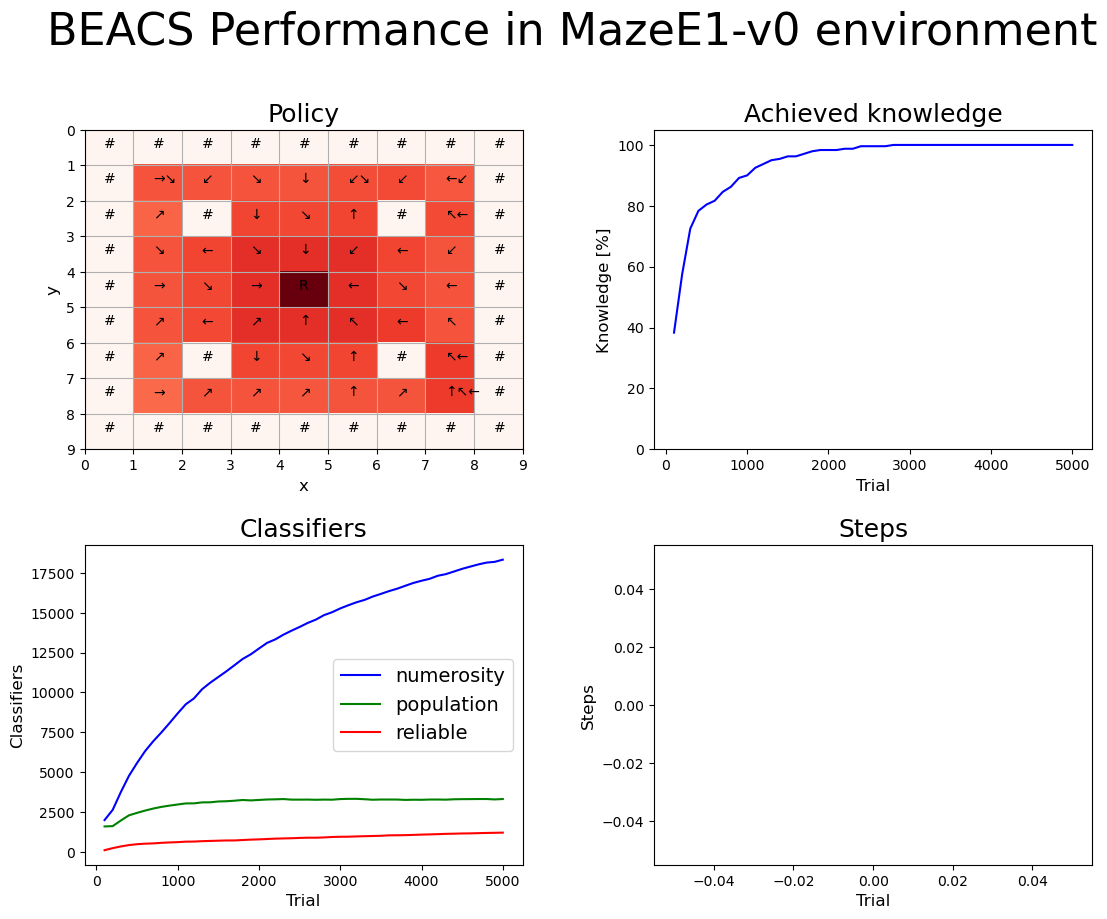

In [5]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, None, None)
plot_performance(agent_explore, maze, metrics_df, cfg_explore, MAZE, metrics_trial_frequency_explore, None)

In [6]:
first_trial, stable_trial, last_trial = _when_full_knowledge_is_achieved(metrics_explore)
print("Full knowledge was achieved at trials ", first_trial, ", was stable at ", stable_trial, 
        " and the last time it was achieved at ", last_trial)

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.\n")

print(_maze_metrics(population_explore, maze))
print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))
pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%\n")

if DO_ZIP:
    agent_explore.zip_population()
    population_explore = agent_explore.get_population()

print("There are ", _how_many_peps_match_non_aliased_states(population_explore, maze),
      " enhanced classifer(s) that match a non-aliased states.\n")

print(_maze_metrics(population_explore, maze))
print("Mean reliable population specifity is ",
      _mean_reliable_classifier_specificity(population_explore, maze))
pep_error = _enhanced_effect_error(population_explore, maze, CLASSIFIER_LENGTH, RANDOM_ATTRIBUTE_LENGTH)
print("Accumulated Error on PEP Probabilities :", pep_error, "%")

Full knowledge was achieved at trials  2800 , was stable at  2800  and the last time it was achieved at  5000
There are  0  enhanced classifer(s) that match a non-aliased states.

{'knowledge': 100.0, 'population': 3310, 'numerosity': 18341, 'reliable': 1199}
Mean reliable population specifity is  0.6071726438698916
Accumulated Error on PEP Probabilities : 0.5560612053068571 %

There are  0  enhanced classifer(s) that match a non-aliased states.

{'knowledge': 100.0, 'population': 858, 'numerosity': 9488, 'reliable': 755}
Mean reliable population specifity is  0.5506622516556291
Accumulated Error on PEP Probabilities : 0.6380796832780088 %


In [7]:
population_explore.sort(key=lambda cl: -cl.fitness)
population_explore_to_display = [cl for cl in population_explore]
for cl in population_explore_to_display:
    print(cl)
    print("\n")

###9#### 3 None (###0###0:#934)
q: 1.0    ra: 1e+03  rb: 1e+03  ir: 1e+03  f: 1e+03  err: 3.287e-07
exp: 794   num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 169005 tbseq: 166669 talp: 169005 tav: 230.9  



#######9 7 None (###0###0:#900)
q: 1.0    ra: 1e+03  rb: 1e+03  ir: 1e+03  f: 1e+03  err: 4.545e-07
exp: 871   num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 169215 tbseq: 168816 talp: 169215 tav: 163.3  



#####9## 5 None (#0###0##:#848)
q: 1.0    ra: 1e+03  rb: 1e+03  ir: 1e+03  f: 1e+03  err: 2.303e-06
exp: 803   num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 169255 tbseq: 680   talp: 169255 tav: 183.6  



##9##### 2 None (##0#####:#484)
q: 1.0    ra: 1e+03  rb: 1e+03  ir: 1e+03  f: 1e+03  err: 0.03218
exp: 432   num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 168153 tbseq: 168011 talp: 168153 tav: 374.4  



#9###### 1 None (#0###0##:#506)
q: 1.0    ra: 1e+03  rb: 1e+03  ir: 1e+03  f: 1e+03  err: 0.02559
exp: 353 



###9##01 0 [3] (###09##0:#37)
q: 0.9288 ra: 552.6  rb: 543.8  ir: 0.0    f: 509.2  err: 472.2 
exp: 37    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00000010
tga: 166393 tbseq: 24099 talp: 166393 tav: 4.343e+03 



0000##11 0 None (#1######:#92)
q: 0.9846 ra: 516.6  rb: 505.4  ir: 0.4944 f: 508.7  err: 327.7 
exp: 73    num: 1 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 163319 tbseq: 167826 talp: 163319 tav: 3.674e+03 



00##0#10 7 [6] (###1#1#1:#24, 11#1#1#1:#39)
q: 0.996  ra: 480.3  rb: 540.5  ir: 0.0    f: 508.4  err: 337.2 
exp: 60    num: 20 ee: False
Mark: empty Aliased_state: 00000010 PAI_state: 00001000
tga: 167101 tbseq: 17869 talp: 167101 tav: 3.633e+03 



###1#000 0 None (#######1:#70)
q: 0.9707 ra: 448.6  rb: 523.0  ir: 0.0    f: 507.7  err: 360.2 
exp: 61    num: 4 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 168861 tbseq: 156897 talp: 168861 tav: 2.854e+03 



#1##1### 0 None (#01000##:#340)
q: 0.6122 ra: 829.1  rb: 829.0  ir: 0.0   



0#01#101 6 [1] (###00010:#39)
q: 0.9288 ra: 432.6  rb: 517.3  ir: 0.0    f: 441.2  err: 358.1 
exp: 36    num: 2 ee: False
Mark: empty Aliased_state:  PAI_state: 10011100
tga: 162573 tbseq: 12847 talp: 162573 tav: 4.565e+03 



###101#1 1 None (###0#000:#640)
q: 0.525  ra: 836.5  rb: 838.8  ir: 2.498e-13 f: 440.4  err: 0.2942
exp: 2     num: 1 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 168971 tbseq: 168971 talp: 168988 tav: 180.7  



###1#1## 7 None (#000#0##:#404)
q: 0.525  ra: 837.7  rb: 838.7  ir: 0.0    f: 440.3  err: 0.2838
exp: 2     num: 1 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 169044 tbseq: 169044 talp: 169062 tav: 171.8  



#0010##1 4 [4] (#1##1###:#69)
q: 0.9972 ra: 441.2  rb: 441.3  ir: 0.0    f: 440.0  err: 281.7 
exp: 69    num: 16 ee: False
Mark: empty Aliased_state:  PAI_state: 00100111
tga: 163372 tbseq: 6502  talp: 163372 tav: 2.295e+03 



#1###9## 7 [0] (1####0#1:#44)
q: 0.9812 ra: 462.0  rb: 434.0  ir: 0.0    f: 439.6  err: 377.7 
exp



01###9## 2 [2] (##11#0#1:#35)
q: 0.9211 ra: 387.1  rb: 489.5  ir: 0.0    f: 403.8  err: 383.3 
exp: 35    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 10000000
tga: 167431 tbseq: 75983 talp: 167431 tav: 2.775e+03 



#0#1#111 1 [6] (###0####:#40)
q: 0.998  ra: 337.8  rb: 470.5  ir: 0.0    f: 403.4  err: 370.4 
exp: 40    num: 19 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 165286 tbseq: 10318 talp: 165286 tav: 4.497e+03 



0#1#1##1 6 [1] (####0010:#49)
q: 0.9266 ra: 388.1  rb: 481.5  ir: 0.0    f: 402.9  err: 385.3 
exp: 44    num: 5 ee: False
Mark: empty Aliased_state:  PAI_state: 10011100
tga: 168686 tbseq: 11811 talp: 168686 tav: 4.316e+03 



#0#111#1 1 [6] (###00010:#33)
q: 0.9962 ra: 351.8  rb: 456.9  ir: 0.0    f: 402.8  err: 416.6 
exp: 33    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 166479 tbseq: 5209  talp: 166479 tav: 5.671e+03 



1#010#01 2 [3, 7] (###01###:#51)
q: 0.9855 ra: 419.0  rb: 408.5  ir: 0.0    f: 402.


#11##1#0 4 None (#####01#:#68)
q: 0.9717 ra: 260.7  rb: 395.6  ir: 0.0    f: 384.5  err: 363.5 
exp: 54    num: 16 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 161670 tbseq: 3212  talp: 161670 tav: 4.788e+03 



##0100#1 2 [5, 4] (0##0#9#0:#26)
q: 0.9357 ra: 409.6  rb: 486.7  ir: 0.0    f: 383.3  err: 485.0 
exp: 26    num: 3 ee: False
Mark: empty Aliased_state:  PAI_state: 11001001
tga: 163613 tbseq: 78905 talp: 163613 tav: 3.204e+03 



##1101#1 6 [5, 5] (000090#0:#27)
q: 0.942  ra: 406.3  rb: 498.6  ir: 0.0    f: 382.7  err: 485.5 
exp: 27    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00100000
tga: 163974 tbseq: 29070 talp: 163974 tav: 4.962e+03 



######9# 2 [0, 1] (#111##1#:#35)
q: 0.9357 ra: 408.7  rb: 504.1  ir: 0.0    f: 382.4  err: 401.2 
exp: 35    num: 18 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 161756 tbseq: 91978 talp: 161756 tav: 2.206e+03 



0##10111 1 [0, 6] (#1#0####:#40)
q: 1.0    ra: 508.1  rb: 381.8  ir: 0.0    f: 381




1##10111 2 [5] (0010####:#53)
q: 0.9731 ra: 424.4  rb: 272.7  ir: 0.0    f: 339.2  err: 305.4 
exp: 53    num: 4 ee: False
Mark: empty Aliased_state:  PAI_state: 11001001
tga: 168676 tbseq: 5364  talp: 168676 tav: 4.752e+03 



01#1##10 7 None (1#001#01:#110, #0001#0#:#94)
q: 0.5249 ra: 645.6  rb: 602.3  ir: 0.007572 f: 338.9  err: 3.931 
exp: 2     num: 1 ee: False
Mark: empty Aliased_state: 01110010 PAI_state: 
tga: 168595 tbseq: 168117 talp: 168595 tav: 1.793e+03 



00000111 2 [7] (#1######:#29)
q: 0.9288 ra: 351.7  rb: 377.4  ir: 0.0    f: 338.6  err: 389.0 
exp: 29    num: 17 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 167109 tbseq: 11387 talp: 167109 tav: 5.618e+03 



####00#1 2 None (###1####:#107)
q: 0.4987 ra: 677.9  rb: 663.8  ir: 0.1303 f: 338.1  err: 0.0   
exp: 1     num: 1 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 168802 tbseq: 168802 talp: 168802 tav: 1.868e+03 



00#11##0 2 None (#1######:#62)
q: 0.9878 ra: 339.4  rb: 341.5  ir: 0.0


##1##1#0 0 None (#####0##:#101)
q: 0.6004 ra: 476.2  rb: 371.1  ir: 0.0    f: 285.9  err: 165.1 
exp: 11    num: 1 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 166048 tbseq: 134676 talp: 166048 tav: 3.114e+03 



#####1## 7 None (#000#0##:#364)
q: 0.3399 ra: 838.3  rb: 838.1  ir: 0.0    f: 284.9  err: 0.0   
exp: 1     num: 1 ee: False
Mark: empty Aliased_state:  PAI_state: 
tga: 169219 tbseq: 169222 talp: 169219 tav: 277.0  



9####### 4 [5] (0##111#1:#29)
q: 0.9251 ra: 275.1  rb: 338.4  ir: 0.0    f: 283.8  err: 365.6 
exp: 29    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 163572 tbseq: 5173  talp: 163572 tav: 5.766e+03 



9#0##### 3 [3, 2] (011111#1:#26)
q: 0.9031 ra: 342.7  rb: 313.2  ir: 0.0    f: 282.9  err: 416.0 
exp: 26    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00100000
tga: 161603 tbseq: 10419 talp: 161603 tav: 5.942e+03 



##0##100 7 None (0#100#11:#86, 0#1000##:#66)
q: 0.474  ra: 593.0  rb: 572.1  ir: 0.06202 f: 281

In [8]:
agent_explore.get_pai_states_memory()

[('1', '0', '0', '1', '1', '1', '0', '0'),
 ('1', '1', '0', '0', '1', '0', '0', '1'),
 ('0', '0', '0', '0', '0', '0', '0', '0'),
 ('0', '0', '1', '0', '0', '1', '1', '1'),
 ('0', '1', '1', '1', '0', '0', '1', '0'),
 ('0', '0', '1', '0', '0', '0', '0', '0'),
 ('1', '0', '0', '0', '0', '0', '0', '0'),
 ('0', '0', '0', '0', '1', '0', '0', '0'),
 ('0', '0', '0', '0', '0', '0', '1', '0')]

## Training of BEACS - Exploitation

In [9]:
%%time

cfg_exploit_no_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_NO_RL,
    gamma=GAMMA,
    epsilon=0.2
)

agent_exploit_no_rl = BEACS(cfg_exploit_no_rl, population_explore)
population_exploit_no_rl, metrics_exploit_no_rl = agent_exploit_no_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_NO_RL)

CPU times: user 1min 2s, sys: 200 ms, total: 1min 2s
Wall time: 1min 15s


In [10]:
%%time

cfg_exploit_rl_start = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL_START,
    gamma=GAMMA,
    epsilon=0.0
)

agent_exploit_rl_start = BEACS(cfg_exploit_rl_start, population_exploit_no_rl)
population_exploit_rl_start, metrics_exploit_rl_start = agent_exploit_rl_start.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL_START)

CPU times: user 1min 1s, sys: 154 ms, total: 1min 2s
Wall time: 1min 12s


In [11]:
%%time

cfg_exploit_rl = Configuration(
    classifier_length=CLASSIFIER_LENGTH,
    number_of_possible_actions=NUMBER_OF_POSSIBLE_ACTIONS,
    user_metrics_collector_fcn=_maze_metrics,
    metrics_trial_frequency=1,
    beta_rl=BETA_EXPLOIT_RL,
    gamma=GAMMA,
    epsilon=0.0,
)

agent_exploit_rl = BEACS(cfg_exploit_rl, population_exploit_rl_start)
population_exploit_rl, metrics_exploit_rl = agent_exploit_rl.exploit(maze, NUMBER_OF_EXPLOIT_TRIALS_RL)

CPU times: user 59.3 s, sys: 144 ms, total: 59.4 s
Wall time: 1min 8s


### Performance

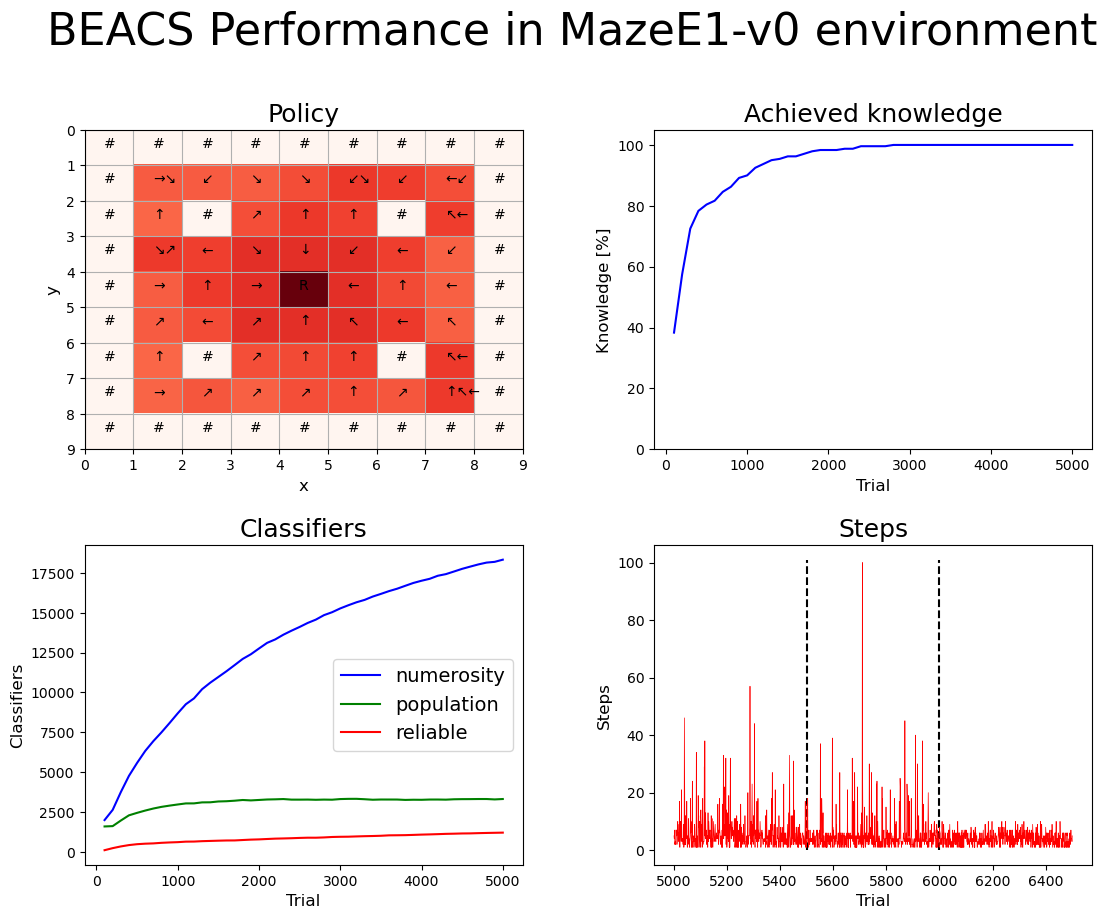

In [12]:
metrics_trial_frequency_explore = cfg_explore.metrics_trial_frequency
metrics_trial_frequency_exploit = 1

metrics_exploit = metrics_exploit_no_rl.copy()
for idx, item in enumerate(metrics_exploit_rl_start):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL
    metrics_exploit.append(tmp)
for idx, item in enumerate(metrics_exploit_rl):
    tmp = item.copy()
    tmp['trial'] += NUMBER_OF_EXPLOIT_TRIALS_NO_RL + NUMBER_OF_EXPLOIT_TRIALS_RL_START
    metrics_exploit.append(tmp)

metrics_df = parse_metrics_to_df(metrics_explore, metrics_trial_frequency_explore, metrics_exploit, metrics_trial_frequency_exploit)
plot_performance(agent_exploit_rl, maze, metrics_df, cfg_exploit_rl, MAZE, metrics_trial_frequency_explore, [NUMBER_OF_EXPLOIT_TRIALS_NO_RL,NUMBER_OF_EXPLOIT_TRIALS_RL_START,NUMBER_OF_EXPLOIT_TRIALS_RL])

In [13]:
avg_step_explore = 0
for trial in metrics_explore:
    avg_step_explore += trial['steps_in_trial']
avg_step_explore /= NUMBER_OF_EXPLORE_TRIALS / metrics_trial_frequency_explore
print("Average number of steps to solve the maze is ",avg_step_explore,
      " for a total of ", NUMBER_OF_EXPLORE_TRIALS, " trials in EXPLORATION")

avg_step_exploit_no_rl = 0
for trial in metrics_exploit_no_rl:
    avg_step_exploit_no_rl += trial['steps_in_trial']
avg_step_exploit_no_rl /= NUMBER_OF_EXPLOIT_TRIALS_NO_RL
print("Average number of steps to solve the maze is ",avg_step_exploit_no_rl,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_NO_RL, " trials in EXPLOITATION without Reinforcement Module")

avg_step_exploit_rl_start = 0
for trial in metrics_exploit_rl_start:
    avg_step_exploit_rl_start += trial['steps_in_trial']
avg_step_exploit_rl_start /= NUMBER_OF_EXPLOIT_TRIALS_RL_START
print("Average number of steps to solve the maze is ",avg_step_exploit_rl_start,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL_START, " trials in EXPLOITATION starting Reinforcement Module")

avg_step_exploit_rl = 0
for trial in metrics_exploit_rl:
    avg_step_exploit_rl += trial['steps_in_trial']
avg_step_exploit_rl /= NUMBER_OF_EXPLOIT_TRIALS_RL
print("Average number of steps to solve the maze is ",avg_step_exploit_rl,
      " for a total of ", NUMBER_OF_EXPLOIT_TRIALS_RL, " trials in EXPLOITATION with Reinforcement Module")

print(_maze_metrics(population_explore, maze))
print(_maze_metrics(population_exploit_no_rl, maze))
print(_maze_metrics(population_exploit_rl_start, maze))
print(_maze_metrics(population_exploit_rl, maze))

Average number of steps to solve the maze is  32.78  for a total of  5000  trials in EXPLORATION
Average number of steps to solve the maze is  6.13  for a total of  500  trials in EXPLOITATION without Reinforcement Module
Average number of steps to solve the maze is  5.54  for a total of  500  trials in EXPLOITATION starting Reinforcement Module
Average number of steps to solve the maze is  4.08  for a total of  500  trials in EXPLOITATION with Reinforcement Module
{'knowledge': 100.0, 'population': 858, 'numerosity': 9488, 'reliable': 755}
{'knowledge': 100.0, 'population': 858, 'numerosity': 9488, 'reliable': 755}
{'knowledge': 100.0, 'population': 858, 'numerosity': 9488, 'reliable': 755}
{'knowledge': 100.0, 'population': 858, 'numerosity': 9488, 'reliable': 755}


In [14]:
population_exploit_rl.sort(key=lambda cl: -cl.fitness)
population_exploit_rl_to_display = [cl for cl in population_exploit_rl
    if cl.behavioral_sequence]
print(len(population_exploit_rl_to_display))
print("\n")
for cl in population_exploit_rl_to_display:
    print(cl)
    print("\n")

490


11#1#0#1 5 [3] (0##0#9#0:#99)
q: 1.0    ra: 950.0  rb: 950.0  ir: 0.0    f: 950.0  err: 0.01344
exp: 99    num: 14 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 169114 tbseq: 8054  talp: 169114 tav: 1.302e+03 



1101##0# 5 [3] (0##0#9#0:#99)
q: 0.9981 ra: 950.0  rb: 950.0  ir: 0.0    f: 948.2  err: 0.01427
exp: 99    num: 2 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 169114 tbseq: 8954  talp: 169114 tav: 1.301e+03 



#1#0##11 3 [1] (#0#9#00#:#82)
q: 1.0    ra: 948.1  rb: 948.2  ir: 0.0    f: 948.2  err: 3.801 
exp: 82    num: 13 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 163792 tbseq: 5632  talp: 163792 tav: 2.235e+03 



#1##1101 0 [7, 6] (#00#00#9:#192)
q: 1.0    ra: 947.8  rb: 946.2  ir: 0.0    f: 946.2  err: 5.825 
exp: 192   num: 15 ee: False
Mark: empty Aliased_state:  PAI_state: 01110010
tga: 166589 tbseq: 11863 talp: 166589 tav: 721.5  



##111101 0 [7, 6] (#00#00#9:#188)
q: 1.0    ra: 945.8  rb: 947.6  ir: 0.0   




###9###1 1 [7] (11#0#1##:#47)
q: 0.977  ra: 513.3  rb: 422.8  ir: 0.0    f: 457.3  err: 361.5 
exp: 47    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 167940 tbseq: 6565  talp: 167940 tav: 4.305e+03 



#1#11##0 7 [1] (#0##00#9:#28)
q: 0.908  ra: 449.2  rb: 555.7  ir: 0.0    f: 456.2  err: 433.8 
exp: 25    num: 5 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 167837 tbseq: 24003 talp: 167837 tav: 5.819e+03 



##0100#1 2 [5, 4] (0##0#9#0:#26)
q: 0.9357 ra: 486.7  rb: 509.9  ir: 0.0    f: 455.4  err: 487.7 
exp: 26    num: 3 ee: False
Mark: empty Aliased_state:  PAI_state: 11001001
tga: 163613 tbseq: 78905 talp: 163613 tav: 3.204e+03 



1101##11 4 [1] (###0100#:#61)
q: 0.9964 ra: 443.6  rb: 467.2  ir: 0.0    f: 453.8  err: 301.8 
exp: 61    num: 19 ee: False
Mark: empty Aliased_state:  PAI_state: 00100111
tga: 160693 tbseq: 26348 talp: 160693 tav: 3.06e+03 



#000##11 2 [4] (####1000:#35)
q: 0.917  ra: 450.8  rb: 538.8  ir: 0.0    f: 453.7

#0000111 3 [6] (###1####:#31)
q: 0.9288 ra: 349.5  rb: 457.8  ir: 0.0    f: 374.9  err: 397.0 
exp: 31    num: 18 ee: False
Mark: empty Aliased_state:  PAI_state: 00001000
tga: 162555 tbseq: 44952 talp: 162555 tav: 3.676e+03 



00##11#0 0 [6] (###0001#:#33)
q: 0.9324 ra: 274.8  rb: 526.1  ir: 0.0    f: 373.4  err: 403.6 
exp: 33    num: 7 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 165979 tbseq: 13377 talp: 165979 tav: 5.179e+03 



###9###1 5 [0, 7] (##10#11#:#46)
q: 0.9551 ra: 422.6  rb: 389.3  ir: 0.0    f: 371.8  err: 323.7 
exp: 46    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 167016 tbseq: 22667 talp: 167016 tav: 3.992e+03 



00#1#111 1 [4, 2] (#9#0##00:#27)
q: 0.908  ra: 509.6  rb: 409.1  ir: 0.0    f: 371.5  err: 483.4 
exp: 27    num: 10 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 165381 tbseq: 77909 talp: 165381 tav: 3.178e+03 



##11#100 4 [7, 6] (#00##0#9:#33)
q: 0.908  ra: 625.8  rb: 408.8  ir: 0.0    f: 




0000#1#1 1 [7, 1] (11##100#:#29)
q: 0.9181 ra: 328.6  rb: 320.5  ir: 0.0    f: 294.2  err: 354.2 
exp: 30    num: 6 ee: True
Mark: 00000111 Aliased_state:  PAI_state: 00100111
tga: 160173 tbseq: 23486 talp: 160173 tav: 4.591e+03 



00#1#111 1 [0, 1] (###0#0#0:#24)
q: 0.9357 ra: 312.4  rb: 428.2  ir: 0.0    f: 292.3  err: 424.6 
exp: 24    num: 18 ee: False
Mark: empty Aliased_state:  PAI_state: 00000000
tga: 163877 tbseq: 71432 talp: 163877 tav: 3.899e+03 



9#0##### 3 [3] (1##111##:#27)
q: 0.9031 ra: 323.6  rb: 315.5  ir: 0.0    f: 288.6  err: 377.0 
exp: 27    num: 20 ee: False
Mark: empty Aliased_state:  PAI_state: 00100000
tga: 166346 tbseq: 16618 talp: 166346 tav: 5.526e+03 



0##10#01 0 [7, 2] (1####1##:#38)
q: 0.9449 ra: 334.6  rb: 304.8  ir: 0.0    f: 288.0  err: 343.1 
exp: 38    num: 9 ee: False
Mark: empty Aliased_state:  PAI_state: 01110010
tga: 158899 tbseq: 15107 talp: 158899 tav: 4.582e+03 



##01111# 0 [3] (10####00:#33)
q: 0.9288 ra: 358.2  rb: 259.5  ir: 0.0   